In [2]:
from BRScraper import nba
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [127]:
# Week 1: Data Collection, Exploration and some Cleaning

# running this will show you what metrics are available for each player and their meaning
player_metrics = [
    "Player",  # Name of the player
    "Age",  # Player's age
    "Team",  # Abbreviation of the team the player belongs to
    "Pos (Position)",  # Player's position on the court (e.g., PG, SG, PF)
    "G (Games Played)",  # Number of games played
    "GS (Games Started)",  # Number of games started
    "MP (Minutes Played)",  # Average minutes played per game
    "FG (Field Goals Made)",  # Average field goals made per game
    "FGA (Field Goals Attempted)",  # Average field goal attempts per game
    "FG% (Field Goal Percentage)",  # Percentage of successful field goals
    "3P (Three-Point Field Goals Made)",  # Average three-pointers made per game
    "3PA (Three-Point Field Goals Attempted)",  # Average three-point attempts per game
    "3P% (Three-Point Percentage)",  # Percentage of successful three-pointers
    "2P (Two-Point Field Goals Made)",  # Average two-pointers made per game
    "2PA (Two-Point Field Goals Attempted)",  # Average two-point attempts per game
    "2P% (Two-Point Percentage)",  # Percentage of successful two-pointers
    "eFG% (Effective Field Goal Percentage)",  # Adjusted FG% accounting for 3P being worth more than 2P
    "FT (Free Throws Made)",  # Average free throws made per game
    "FTA (Free Throws Attempted)",  # Average free throw attempts per game
    "FT% (Free Throw Percentage)",  # Percentage of successful free throws
    "ORB (Offensive Rebounds)",  # Average offensive rebounds per game
    "DRB (Defensive Rebounds)",  # Average defensive rebounds per game
    "TRB (Total Rebounds)",  # Average total rebounds per game (ORB + DRB)
    "AST (Assists)",  # Average assists per game
    "STL (Steals)",  # Average steals per game
    "BLK (Blocks)",  # Average blocks per game
    "TOV (Turnovers)",  # Average turnovers per game
    "PF (Personal Fouls)",  # Average personal fouls per game
    "PTS (Points)",  # Average points scored per game
    "Awards (Awards and Rankings)",  # Achievements, awards, and rankings (e.g., MVP-1, AS)
    "Season (Season Year)",  # The season the stats belong to (e.g., 2022-23)
]

for metric in player_metrics:
    print(metric)

Player
Age
Team
Pos (Position)
G (Games Played)
GS (Games Started)
MP (Minutes Played)
FG (Field Goals Made)
FGA (Field Goals Attempted)
FG% (Field Goal Percentage)
3P (Three-Point Field Goals Made)
3PA (Three-Point Field Goals Attempted)
3P% (Three-Point Percentage)
2P (Two-Point Field Goals Made)
2PA (Two-Point Field Goals Attempted)
2P% (Two-Point Percentage)
eFG% (Effective Field Goal Percentage)
FT (Free Throws Made)
FTA (Free Throws Attempted)
FT% (Free Throw Percentage)
ORB (Offensive Rebounds)
DRB (Defensive Rebounds)
TRB (Total Rebounds)
AST (Assists)
STL (Steals)
BLK (Blocks)
TOV (Turnovers)
PF (Personal Fouls)
PTS (Points)
Awards (Awards and Rankings)
Season (Season Year)


In [128]:
df = nba.get_stats(season=2024, info='per_game', playoffs=False)

print(df.columns)

# checking and handling missing values if neccessary
df.isnull().sum()

print(df.duplicated().sum()) # output is 0, no duplicates were found as expected

print(df.describe())

Index(['Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Awards',
       'Season'],
      dtype='object')
0
              Age           G          GS          MP          FG         FGA  \
count  735.000000  735.000000  735.000000  735.000000  735.000000  735.000000   
mean    26.155102   40.880272   18.440816   18.264762    2.972789    6.423401   
std      4.371745   25.581293   25.024108    9.735524    2.356999    4.783384   
min     19.000000    1.000000    0.000000    0.500000    0.000000    0.000000   
25%     23.000000   17.000000    0.000000   10.600000    1.300000    3.000000   
50%     25.000000   41.000000    5.000000   17.200000    2.300000    5.000000   
75%     29.000000   64.500000   29.000000   26.450000    4.150000    8.700000   
max     39.000000   84.000000   82.000000   37.800000   11.500000   23.600000   

In [129]:
# All awards and nominations that can be given to a player during and after the season
awards = {
    'MVP': 'Most Valuable Player',
    'DPOY': 'Defensive Player of the Year',
    'CPOY': 'Comeback Player of the Year',
    'AS': 'All-Star',
    'NBA1': 'All-NBA First Team',
    'NBA2': 'All-NBA Second Team',
    'NBA3': 'All-NBA Third Team',
}

for award in awards:
    print(award)

# for any awards that have a hyphen and a # after (e.g., MVP-6) tells us the player's rank in the voting for that awards in that given season.
# So if a player has MVP-1, they ranked in 1st place and won MVP for that season, if a player has MVP-6, they ranked 6th in MVP voting.

MVP
DPOY
CPOY
AS
NBA1
NBA2
NBA3


In [130]:
print(df.head(20)) # getting all metrics/averages for players during the 2023-24 regular season, for the first

                     Player   Age Team Pos     G    GS    MP    FG   FGA  \
0               Joel Embiid  29.0  PHI   C  39.0  39.0  33.6  11.5  21.8   
1               Luka Dončić  24.0  DAL  PG  70.0  70.0  37.5  11.5  23.6   
2     Giannis Antetokounmpo  29.0  MIL  PF  73.0  73.0  35.2  11.5  18.8   
3   Shai Gilgeous-Alexander  25.0  OKC  PG  75.0  75.0  34.0  10.6  19.8   
4             Jalen Brunson  27.0  NYK  PG  77.0  77.0  35.4  10.3  21.4   
5              Devin Booker  27.0  PHO  PG  68.0  68.0  36.0   9.4  19.2   
6              Kevin Durant  35.0  PHO  PF  75.0  75.0  37.2  10.0  19.1   
7              Jayson Tatum  25.0  BOS  PF  74.0  74.0  35.7   9.1  19.3   
8              De'Aaron Fox  26.0  SAC  PG  74.0  74.0  35.9   9.7  20.9   
9          Donovan Mitchell  27.0  CLE  SG  55.0  55.0  35.3   9.1  19.8   
10            Stephen Curry  35.0  GSW  PG  74.0  74.0  32.7   8.8  19.5   
11             Nikola Jokić  28.0  DEN   C  79.0  79.0  34.6  10.4  17.9   
12          

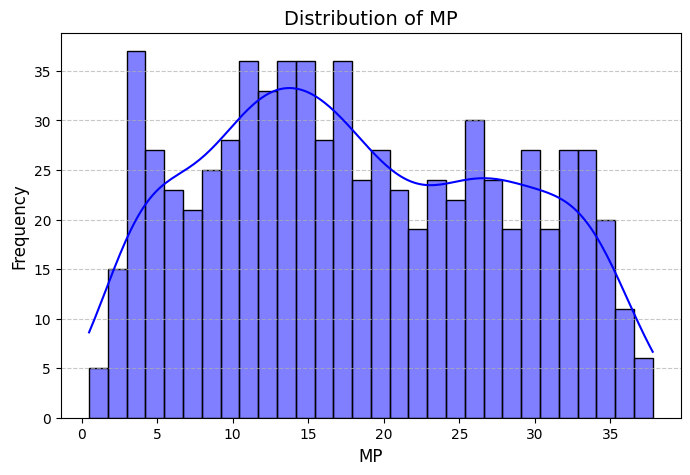

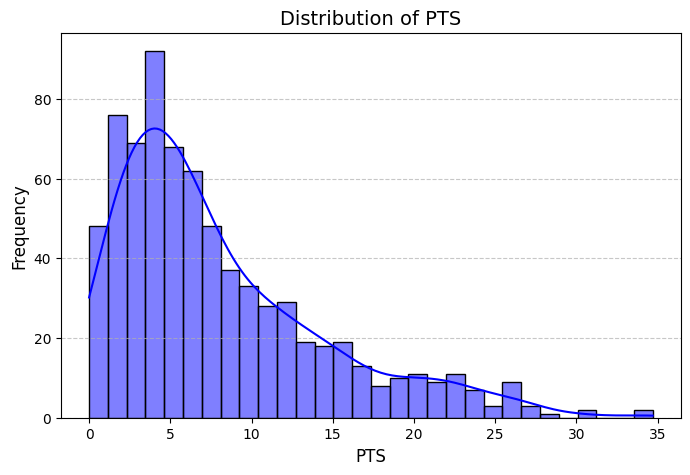

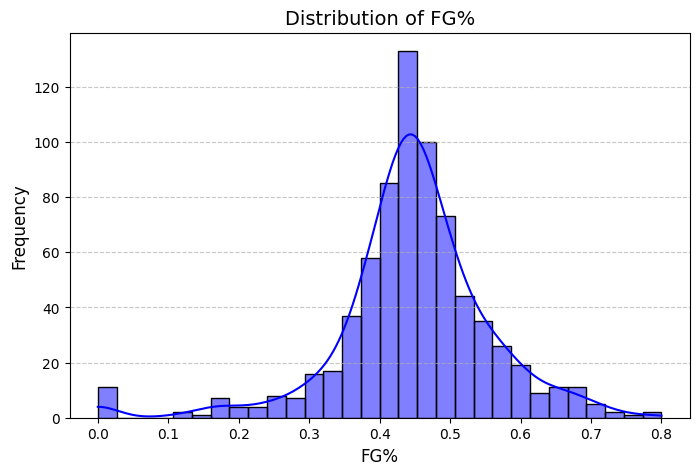

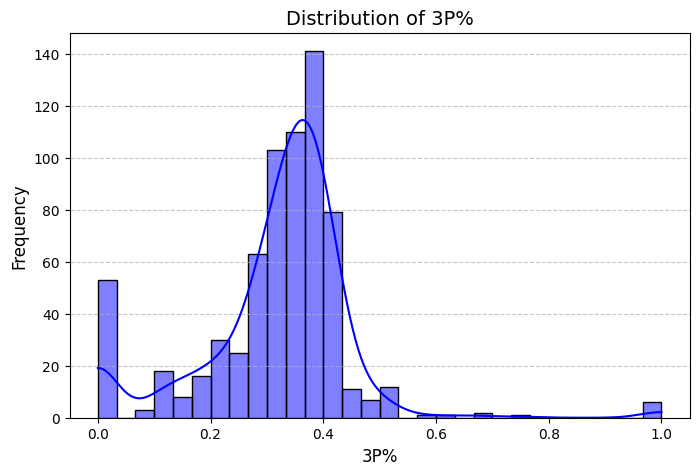

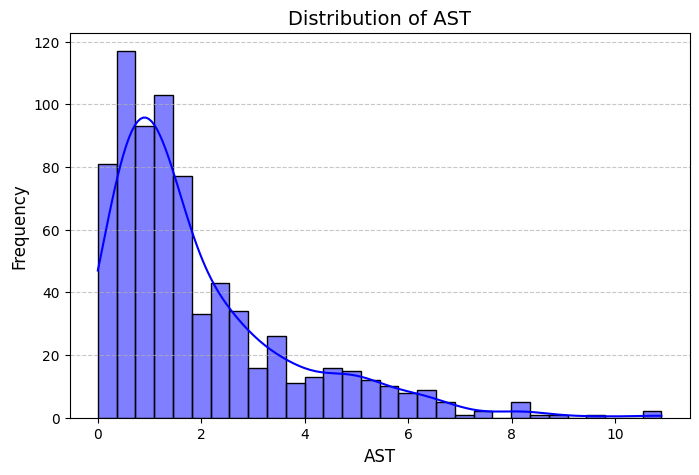

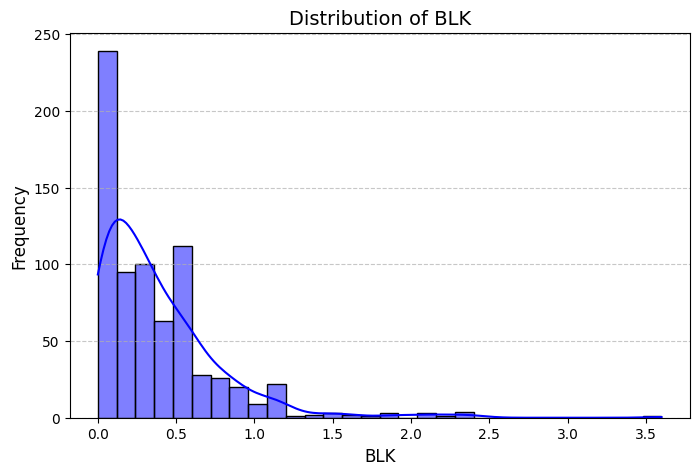

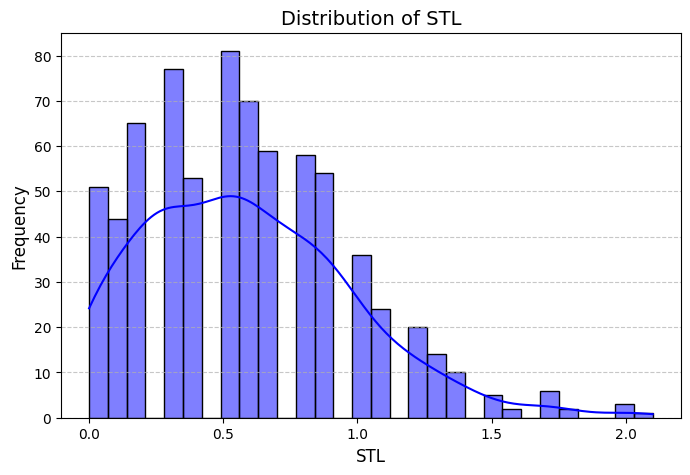

In [131]:
#getting the distributions for different metricsw for the 2023-2024 season

df.head()
metrics = ["MP", "PTS", "FG%", "3P%", "AST", "BLK", "STL"]  # Add more columns if needed

for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[metric], kde=True, bins=30, color='blue', edgecolor='black')
    plt.title(f"Distribution of {metric}", fontsize=14)
    plt.xlabel(metric, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

Some observations for the distributions above (For the 2023-24 regular season )

MP (Minutes Played)
Evenly distributed - I see that most players are spread out in when it comes to the average minutes they played per game. Which makes sense when we consider that different players on a team will have varied playing times becuase of their role. 

PTS (Points Scored)
Skewed left - Most players in this season seemed to have score relatively few points per game. A smaller number of players (usually stars) seem to makeup most of the scoring load.


FG% (Field Goal Percentage)
Bell curve with a peak at ~45% - Shooting efficiency varied widely, with most players falling around the league average of ~45%. Tells us most players in the league this season scored pretty effecientlly. We can expect players with great scoring ability, or centers who mainly take close shots to be in the right tail end of the range.


3P% (Three-Point Percentage)
Bell curve skewed slightly left, peak at ~40% - Majority of players had around 30–40% for three-point shooting. 


AST (Assists)
kewed left, peak at ~1 assist per game - Most players averaged only a few assists per game, this is a harder stat to achieve.


BLK (Blocks)
Skewed left, peak below 1 block per game - Blocking shots is a specialized skill often dominated by big men. Which means not all players can achieve this, and then on top of that, not all big men are great at blocking; another stat that is hard to come by.


STL (Steals)
Left-skewed, peak below 1 steal per game - Steals are also a specialized skill that most players rarely achieve. 

In [132]:
# General info from NBA history
df = nba.get_general_info()
print(df)

     Season   Lg               Champion        MVP Rookie of the Year  \
0   2024-25  NBA                    NaN        NaN                NaN   
1   2023-24  NBA         Boston Celtics   N. Jokić      V. Wembanyama   
2   2022-23  NBA         Denver Nuggets  J. Embiid        P. Banchero   
3   2021-22  NBA  Golden State Warriors   N. Jokić          S. Barnes   
4   2020-21  NBA        Milwaukee Bucks   N. Jokić            L. Ball   
..      ...  ...                    ...        ...                ...   
83  1950-51  NBA       Rochester Royals        NaN          P. Arizin   
84  1949-50  NBA     Minneapolis Lakers        NaN           A. Groza   
85  1948-49  BAA     Minneapolis Lakers        NaN         H. Shannon   
86  1947-48  BAA      Baltimore Bullets        NaN         P. Hoffman   
87  1946-47  BAA  Philadelphia Warriors        NaN                NaN   

                         Points           Rebounds              Assists  \
0   S. Gilgeous-Alexander (599)     I. Zubac (27

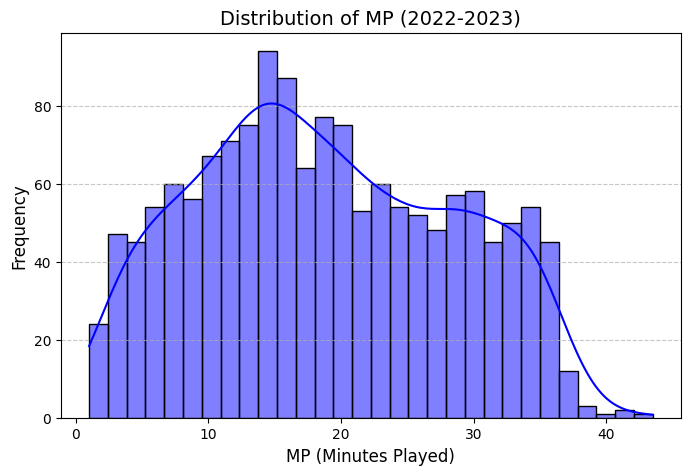

In [133]:
# here i got the distribution for MP (minutes played) from 2022 to 2023. (adjusting the range further than like 10 years is prone to a 429 error - too many requests).
# reference used: https://matplotlib.org/stable/api/index.html
start_season = 2022
end_season = 2023
metric = "MP"
mp_data = []  # thiss list stores the MP values

for season in range(start_season, end_season + 1):
        df_season = nba.get_stats(season=season, info='per_game', playoffs=False) #getting the stats for a given season
        
        if metric in df_season.columns:
            mp_data.extend(df_season[metric].dropna().tolist()) # and then adding it to the list
        
        time.sleep(1.5) # I added this to help prevent being locked out of the API (429 error) - not reliable.

df_all_mp = pd.DataFrame(mp_data, columns=[metric]) # placing all the data from the list into a dataframe

plt.figure(figsize=(8, 5))
sns.histplot(df_all_mp[metric], kde=True, bins=30, color='blue', edgecolor='black')
plt.title(f"Distribution of {metric} (2022-2023)", fontsize=14)
plt.xlabel(f"{metric} (Minutes Played)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

I was working on code to get the same distributions for these metrics, but accross a longer time period (1946-47 - 2023-14 season), the issue is that causes way too many requests to the library and I got locked out several times because of it. I tried to do what prof told us, which is to download all the data to my local machine and then manipulate the file - same issue occurs, in order to dowload the data, we would have to fetch all of necccsary information first to then compile it into a csv file. 

(Ryan found a solution by collecting and storing the data in parts/groups)

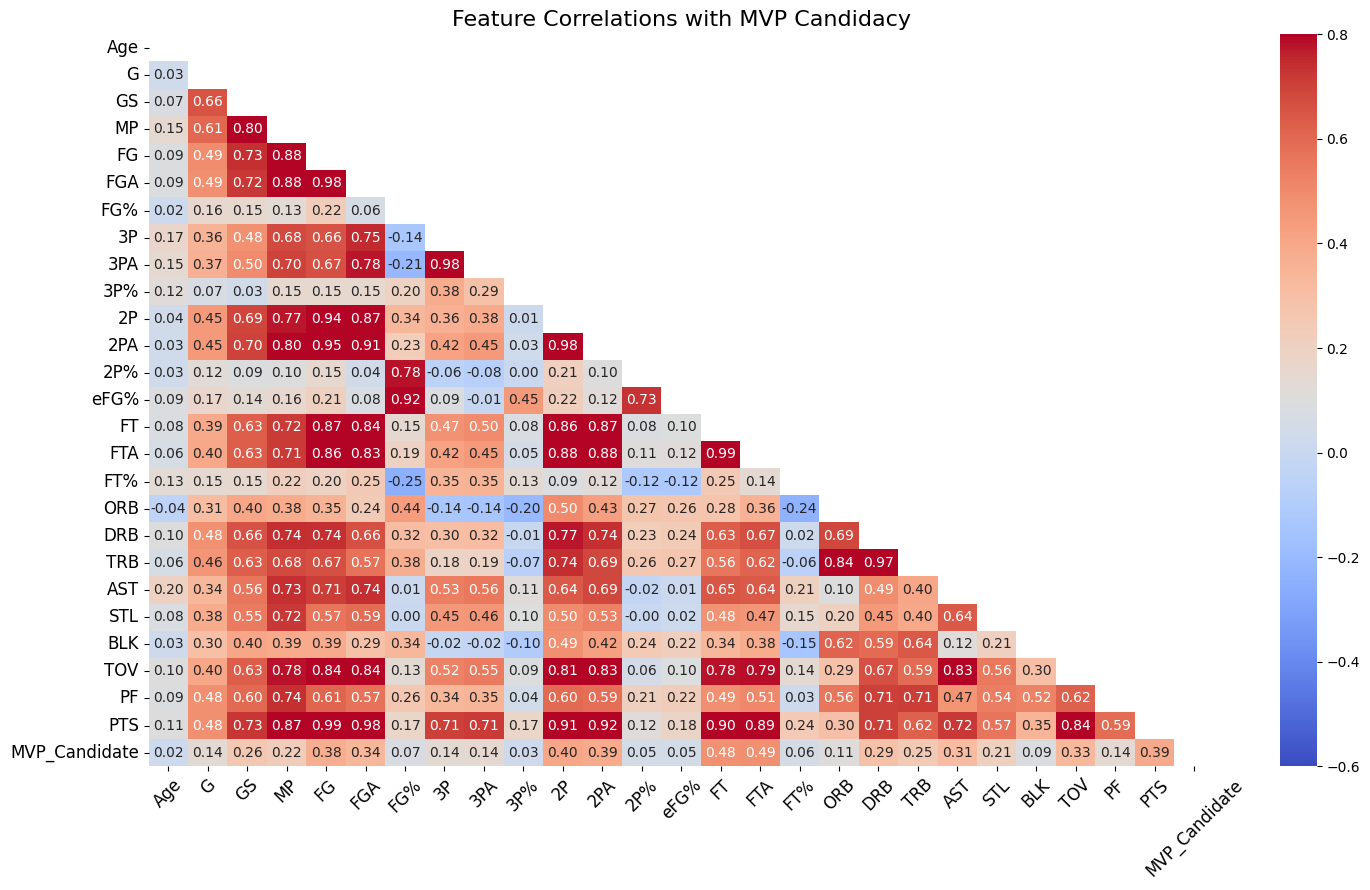

                    Player                       Awards  MVP_Candidate
0              Joel Embiid  MVP-1,DPOY-9,CPOY-5,AS,NBA1              1
1              Luka Dončić         MVP-8,CPOY-8,AS,NBA1              1
2           Damian Lillard              CPOY-10,AS,NBA3              0
3  Shai Gilgeous-Alexander         MVP-5,CPOY-7,AS,NBA1              1
4    Giannis Antetokounmpo         MVP-3,DPOY-6,AS,NBA1              1
5             Jayson Tatum        MVP-4,CPOY-10,AS,NBA1              1
6            Stephen Curry         MVP-9,CPOY-9,AS,NBA2              1
7             Kevin Durant                           AS              0


In [134]:
# Creating a correlation matrix to visualize correlations between features, and see which features have
# the strongest correlation to being elected as MVP in a given season, given stats from current MVP candidates
# reference used: https://www.geeksforgeeks.org/how-to-draw-2d-heatmap-using-matplotlib-in-python/

df = nba.get_stats(season=2023, info='per_game', playoffs=False)

# adding the MVP row & col, shows how features correlate with being an MVP candidate
df['MVP_Candidate'] = df['Awards'].fillna('').apply(lambda x: 1 if 'MVP' in x else 0)

correlation_matrix = df.corr(numeric_only=True) # collecting all the numeric columns (features) from the data frame

triangular_mask = np.triu(np.ones_like(correlation_matrix, dtype=bool)) # helps clear redundant info by creating a triangular heatmap

plt.figure(figsize=(15, 9))
sns.heatmap(
    correlation_matrix,
    mask=triangular_mask,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    vmin=-0.6, 
    vmax=0.8
)

plt.title("Feature Correlations with MVP Candidacy", fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

print(df[['Player', 'Awards', 'MVP_Candidate']].head(8))

In [19]:
#creating simple baseline model that uses a combo of weighted feature to predict MVP candidacy
df = nba.get_stats(season=2023, info='per_game', playoffs=False)

key_metrics = ["FG", "2P", "FT", "AST", "PTS"] # these were the metrics that correlated the highest with MVP candidacy from the heatmap above
mvp_data = df[["Player", "Awards"] + key_metrics].copy()

# dropping players who possibly have NaN values the metrics just help avoid issues
mvp_data = mvp_data.dropna(subset=key_metrics)

# scaling each metric to a range of 0 to 1 to make sure that all metrics are compared fairly
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
mvp_data[key_metrics] = scaler.fit_transform(mvp_data[key_metrics])


weights = {"FG": 1, "2P": 1, "FT": 1, "AST": 1, "PTS": 1}

# computing MVP_Score for each player in df as the sum of their weighted normalized metrics
mvp_data["MVP_Score"] = (
    mvp_data["FG"] * weights["FG"] +
    mvp_data["2P"] * weights["2P"] +
    mvp_data["FT"] * weights["FT"] +
    mvp_data["AST"] * weights["AST"] +
    mvp_data["PTS"] * weights["PTS"]
)

# then we sort all the ranked players and pick out the top 10
mvp_data = mvp_data.sort_values(by="MVP_Score", ascending=False)
top_10_mvp_candidates = mvp_data.head(10)

print("Top 10 MVP Candidates:")
print(top_10_mvp_candidates[["Player", "MVP_Score"]])
# print(mvp_data)

Top 10 MVP Candidates:
                     Player  MVP_Score
0               Joel Embiid   4.327047
3   Shai Gilgeous-Alexander   4.275993
4     Giannis Antetokounmpo   4.262287
1               Luka Dončić   4.251158
2            Damian Lillard   3.906481
8              Kevin Durant   3.838679
18               Trae Young   3.837907
10             LeBron James   3.807316
28             Nikola Jokić   3.794879
17                Ja Morant   3.731764


In [20]:
df.head(10)

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards,Season
0,Joel Embiid,28.0,PHI,C,66.0,66.0,34.6,11.0,20.1,0.548,...,8.4,10.2,4.2,1.0,1.7,3.4,3.1,33.1,"MVP-1,DPOY-9,CPOY-5,AS,NBA1",2022-23
1,Luka Dončić,23.0,DAL,PG,66.0,66.0,36.2,10.9,22.0,0.496,...,7.8,8.6,8.0,1.4,0.5,3.6,2.5,32.4,"MVP-8,CPOY-8,AS,NBA1",2022-23
2,Damian Lillard,32.0,POR,PG,58.0,58.0,36.3,9.6,20.7,0.463,...,4.0,4.8,7.3,0.9,0.3,3.3,1.9,32.2,"CPOY-10,AS,NBA3",2022-23
3,Shai Gilgeous-Alexander,24.0,OKC,PG,68.0,68.0,35.5,10.4,20.3,0.510,...,4.0,4.8,5.5,1.6,1.0,2.8,2.8,31.4,"MVP-5,CPOY-7,AS,NBA1",2022-23
4,Giannis Antetokounmpo,28.0,MIL,PF,63.0,63.0,32.1,11.2,20.3,0.553,...,9.6,11.8,5.7,0.8,0.8,3.9,3.1,31.1,"MVP-3,DPOY-6,AS,NBA1",2022-23
5,Jayson Tatum,24.0,BOS,SF,74.0,74.0,36.9,9.8,21.1,0.466,...,7.7,8.8,4.6,1.1,0.7,2.9,2.2,30.1,"MVP-4,CPOY-10,AS,NBA1",2022-23
6,Stephen Curry,34.0,GSW,PG,56.0,56.0,34.7,10.0,20.2,0.493,...,5.4,6.1,6.3,0.9,0.4,3.2,2.1,29.4,"MVP-9,CPOY-9,AS,NBA2",2022-23
7,Kevin Durant,34.0,2TM,PF,47.0,47.0,35.6,10.3,18.3,0.560,...,6.3,6.7,5.0,0.7,1.4,3.3,2.1,29.1,AS,2022-23
8,Kevin Durant,34.0,BRK,PF,39.0,39.0,36.0,10.5,18.8,0.559,...,6.4,6.7,5.3,0.8,1.5,3.5,2.4,29.7,NaN,2022-23
9,Kevin Durant,34.0,PHO,PF,8.0,8.0,33.6,9.1,16.0,0.570,...,6.0,6.4,3.5,0.3,1.3,2.5,0.9,26.0,NaN,2022-23
